In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('data_set/train.csv')
test = pd.read_csv('data_set/test.csv')
name = train.Name

在今天的数据集中有两组数据:
- 训练集 (train.csv)
- 测试集 (test.csv)
<br>
训练集的数据中包含性别 票价 船舱等级和是否存活下来等信息，这些信息用来创建机器学习模型。
<br><br>
在测试集中不包含人员是否存活信息
<br><br>
<h4>变量定义</h4>
- 是否存活
 - 0= 死亡
 - 1= 存活
- pclass (船舱等级)
 - 1=1st  头等
 - 2=2nd  二等
 - 3=3rd  三等
 
- sex  性别
<br>

- age  年龄


- sibsp (兄弟姐妹数量 / 配偶数)
<br>
- parch (父母数量 / 小孩)
<br>
- tickets  船票序列号
<br>
- fare  票价
<br>
- cabin  船舱位置
- embarked 上船港口
 - C = Cherbourg, 法国瑟堡
 - Q = Queenstown,  爱尔兰城市皇后镇（又译昆士敦）
 - S = Southampton  英国 南安普顿
- pclass: 船舱等级 ()
<br>
<h4></h4>
 - 1st = 头等
 - 2nd = 中等
 - 3rd = 三等

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
train1 = pd.read_csv('data_set/train.csv')

In [84]:
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


数据集中的不同类型
四类数据集

数字类特征: 年龄，票价，兄弟姐妹配偶数量，父母小孩数量

类别特征: 性别，港口，船舱等级，是否存活

包含数字和字符的特征: 船票和船舱

文字类特征: 姓名

** 在做数据整理的过程中我们会对上述四类数据进行调整**

## Part 1 数据清理

In [4]:
train.shape

(891, 12)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**如何处理数据空值，利用Imputer方法(sklearn.preprocessing.Imputer)**

In [6]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=1)
new = imp.fit_transform(train.Age.values.reshape(1, -1))
train['Age2'] = new.T

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
dtype: int64

In [8]:
train.drop('Age', axis=1, inplace=True)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
dtype: int64

In [10]:
train.set_index('PassengerId', inplace=True)
## get dummy variables for Column sex and embarked since they are categorical value.
train = pd.get_dummies(train, columns=['Sex'], drop_first=True)
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)

In [11]:
train.head()

,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,22.0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,38.0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,26.0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,35.0,0,0,1
5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,35.0,1,0,1


In [14]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [17]:
train['Fare'] = train['Fare'].astype(int)
train.loc[train.Fare <= 7.91, 'Fare'] = 0
train.loc[(train.Fare > 7.91) & (train.Fare <= 14.454), 'Fare'] = 1
train.loc[(train.Fare > 14.454) & (train.Fare <= 31), 'Fare'] = 2
train.loc[(train.Fare > 31), 'Fare'] = 3

In [18]:
train.head()

,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,NaN,22.0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,3,C85,38.0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,0,NaN,26.0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,3,C123,35.0,0,0,1
5,0,3,"Allen, Mr. William Henry",0,0,373450,1,NaN,35.0,1,0,1


In [19]:
train['Age2'] = train['Age2'].astype(int)
train.loc[train['Age2'] <= 10, 'Age2'] = 0
train.loc[(train['Age2'] > 10) & (train['Age2'] <= 20), 'Age2'] = 1
train.loc[(train['Age2'] > 20) & (train['Age2'] <= 30), 'Age2'] = 2
train.loc[(train['Age2'] > 30) & (train['Age2'] <= 40), 'Age2'] = 3
train.loc[(train['Age2'] > 40) & (train['Age2'] <= 50), 'Age2'] = 4
train.loc[(train['Age2'] > 50) & (train['Age2'] <= 60), 'Age2'] = 5
train.loc[train['Age2'] > 60, 'Age2'] = 6

In [20]:
train.head()

,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,NaN,2,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,3,C85,3,0,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,0,NaN,2,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,3,C123,3,0,0,1
5,0,3,"Allen, Mr. William Henry",0,0,373450,1,NaN,3,1,0,1


In [21]:
train.drop(['Ticket', 'Cabin', 'Name'], axis=1, inplace=True)
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,2,1,0,1
2,1,1,1,0,3,3,0,0,0
3,1,3,0,0,0,2,0,0,1
4,1,1,1,0,3,3,0,0,1
5,0,3,0,0,1,3,1,0,1


In [22]:
type(train.Age2)

pandas.core.series.Series

## Part 2 EDA

In [24]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
train.Survived.value_counts() / len(train) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [26]:
train.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,1.453423,2.328844,0.647587,0.086420,0.722783
std,0.486592,0.836071,1.102743,0.806057,1.124206,1.296776,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,2.000000,3.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,3.000000,6.000000,1.000000,1.000000,1.000000


In [27]:
train.groupby('Sex_male').mean()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Embarked_Q,Embarked_S
Sex_male,,,,,,,,
0,0.742038,2.159236,0.694268,0.649682,1.815287,2.197452,0.114650,0.646497
1,0.188908,2.389948,0.429809,0.235702,1.256499,2.400347,0.071057,0.764298


通过统计分析发现，总的生存率是38%
其中女性的存活率是74%，男性的存活率是19%

使用相关性矩阵和热力图演示关联度

In [28]:
train.corr()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.035322,0.081629,0.301792,-0.047124,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.660699,-0.346585,0.131900,0.221009,0.081720
SibSp,-0.035322,0.083081,1.000000,0.414838,0.365893,-0.223336,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,0.414838,1.000000,0.363097,-0.153507,-0.245489,-0.081228,0.063036
Fare,0.301792,-0.660699,0.365893,0.363097,1.000000,0.118034,-0.237585,-0.227213,-0.035715
Age2,-0.047124,-0.346585,-0.223336,-0.153507,0.118034,1.000000,0.074787,-0.059546,0.012042
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.237585,0.074787,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.227213,-0.059546,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.070941,0.063036,-0.035715,0.012042,0.125722,-0.496624,1.000000


Text(0.5, 1, 'Correlations Among Features')

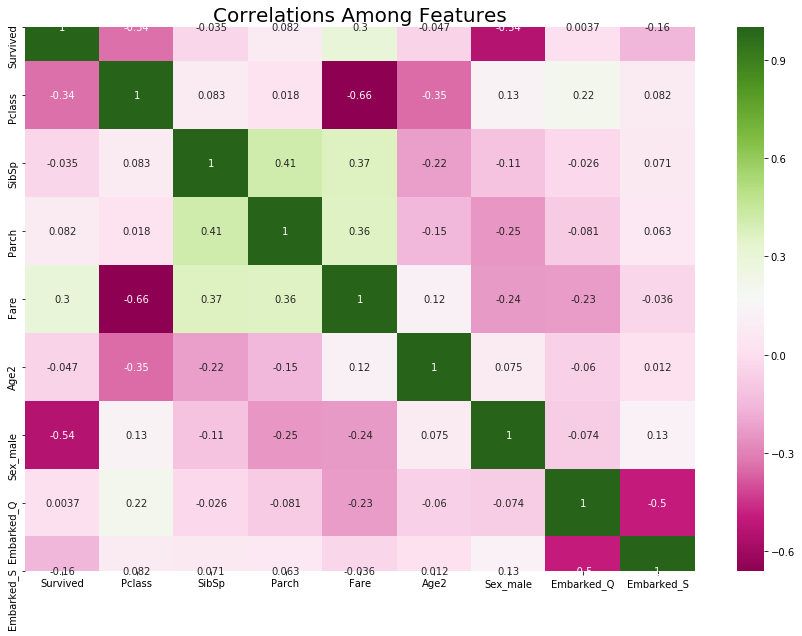

In [31]:
plt.subplots(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True, cmap='PiYG')
plt.title('Correlations Among Features', fontsize=20)

其中正相关的部分最明显的是船票价格和生存率 达到0.26 负相关部分 性别和生存率之间是 -0.54 船票价格和船舱等级是 -0.55 船舱等级和生存率之间是 -0.34

性别和生存率的关系

([<matplotlib.axis.XTick at 0x11e40fb0bc8>,
 <a list of 2 Text xticklabel objects>)

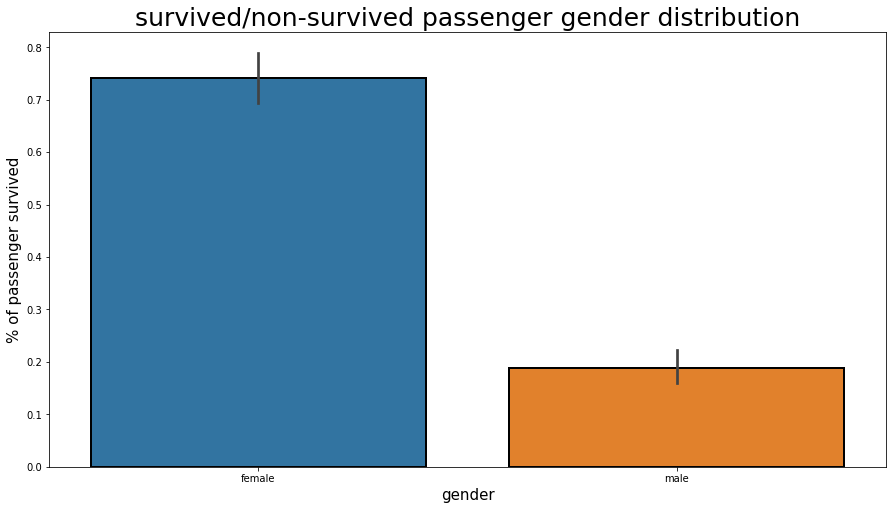

In [32]:
plt.subplots(figsize=(15, 8))
sns.barplot(x='Sex_male',
            y='Survived',
            data=train,
            edgecolor=(0, 0, 0),
            linewidth=2)
plt.title('survived/non-survived passenger gender distribution', fontsize=25)
labels = ['female', 'male']
plt.ylabel('% of passenger survived', fontsize=15)
plt.xlabel('gender', fontsize=15)
plt.xticks(sorted(train.Sex_male.unique()), labels)

女性的存活率是74%，男性的存活率是19%

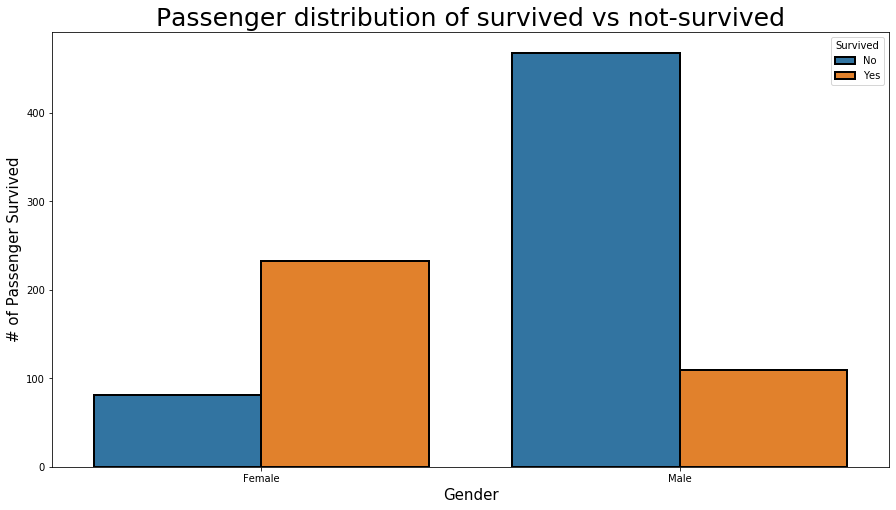

In [33]:
plt.subplots(figsize=(15, 8))
ax = sns.countplot(x='Sex_male',
                   data=train,
                   hue='Survived',
                   edgecolor=(0, 0, 0),
                   linewidth=2)
train.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize=15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(train.Survived.unique()), labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs = leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

结论 在这场灾难中 女士优先

船舱等级和生存率

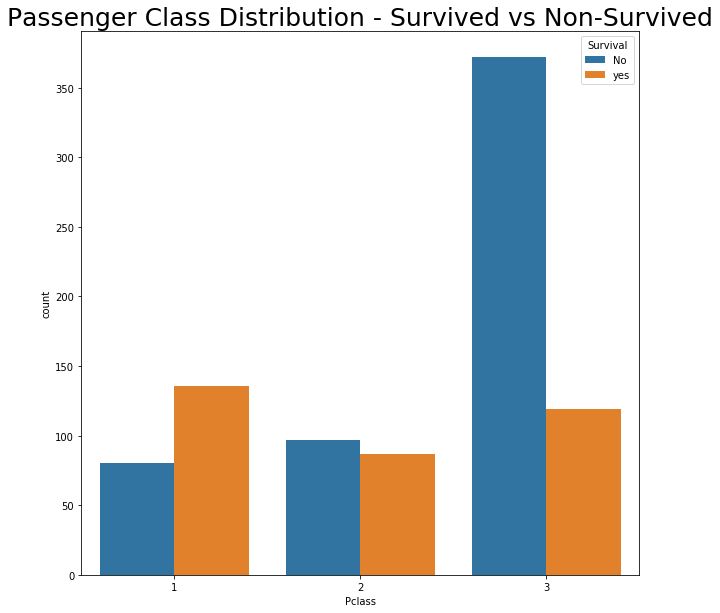

In [34]:
plt.subplots(figsize=(10, 10))
ax = sns.countplot(x='Pclass', data=train, hue='Survived')
plt.title("Passenger Class Distribution - Survived vs Non-Survived",
          fontsize=25)
leg = ax.get_legend()
leg.set_title('Survival')
legs = leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

头等舱的客人存活率是63%
二等舱的客人存活率是48%
三等舱的客人存活率是24%

([<matplotlib.axis.XTick at 0x11e412e4548>,
 <a list of 3 Text xticklabel objects>)

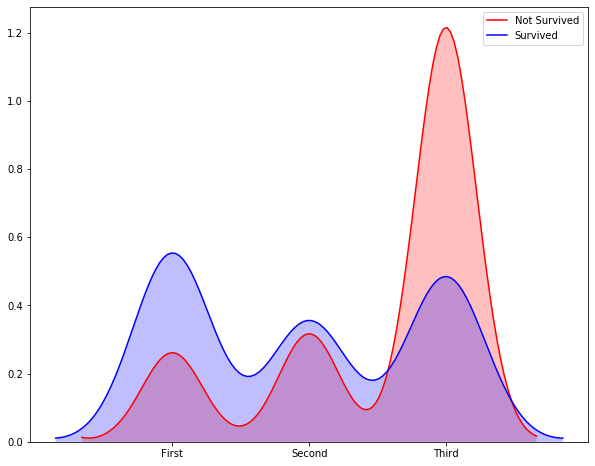

In [37]:
plt.subplots(figsize=(10, 8))
sns.kdeplot(train.loc[(train['Survived'] == 0), 'Pclass'],
            shade=True,
            color='r',
            label='Not Survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Pclass'],
                 shade=True,
                 color='b',
                 label='Survived')
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()), labels)

票价和生存率

Text(0.5, 0, 'fare')

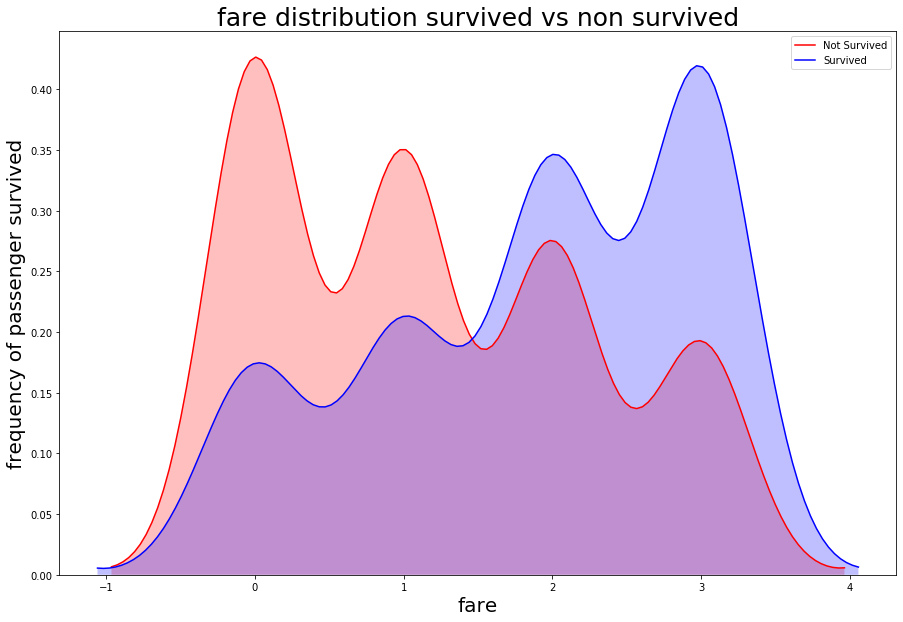

In [38]:
plt.subplots(figsize=(15, 10))
ax = sns.kdeplot(train.loc[(train['Survived'] == 0), 'Fare'],
                 shade=True,
                 color='r',
                 label='Not Survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Fare'],
                 shade=True,
                 color='b',
                 label='Survived')
plt.title('fare distribution survived vs non survived', fontsize=25)
plt.ylabel('frequency of passenger survived', fontsize=20)
plt.xlabel('fare', fontsize=20)

年龄和生存率

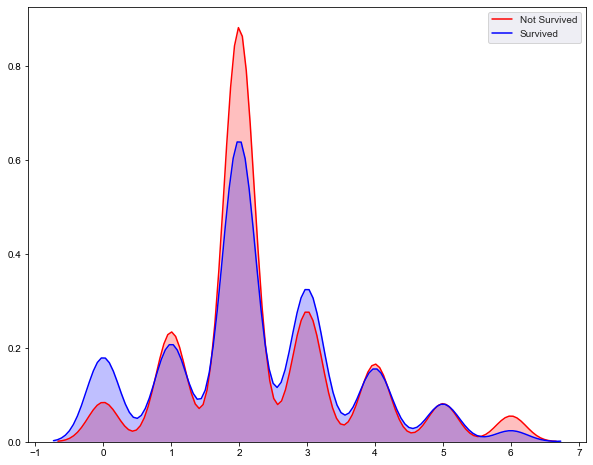

In [39]:
fig, axs = plt.subplots(figsize=(10, 8))
sns.set_style(style='darkgrid')
sns.kdeplot(train.loc[(train['Survived'] == 0), 'Age2'],
            color='r',
            shade=True,
            label='Not Survived')
sns.kdeplot(train.loc[(train['Survived'] == 1), 'Age2'],
            color='b',
            shade=True,
            label='Survived')

In [40]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,2,1,0,1
2,1,1,1,0,3,3,0,0,0
3,1,3,0,0,0,2,0,0,1
4,1,1,1,0,3,3,0,0,1
5,0,3,0,0,1,3,1,0,1


## Part 3 机器学习部分

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

In [47]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

In [48]:
log_cols = ['classifier', 'accuracy']
log = pd.DataFrame(columns=log_cols)

In [49]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

In [50]:
acc_dict = {}

In [52]:
X = train.drop('Survived', axis=1)
y = train['Survived'].astype(int)

In [53]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        predict = clf.predict(X_test)
        acc = accuracy_score(y_test, predict)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this 

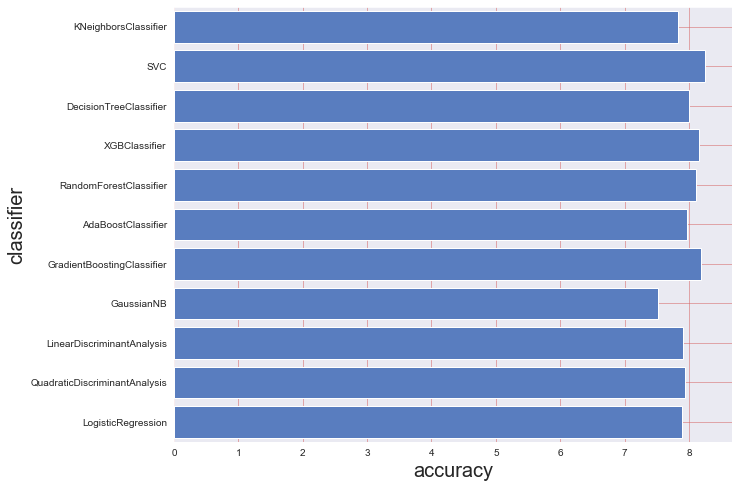

In [57]:
log.classifier = acc_dict.keys()
log.accuracy = acc_dict.values()
log.set_index([list(range(11))])
sns.set_color_codes('muted')
ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(y='classifier', x='accuracy', data=log, color='b')
ax.set_xlabel('accuracy', fontsize=20)
plt.ylabel('classifier', fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)

In [162]:
svc = SVC()
gbc = GradientBoostingClassifier()
xtrain = train.iloc[:, 1:]
ytrain = train.iloc[:, :1]
ytrain = ytrain.values.ravel()
svc.fit(xtrain, ytrain)
gbc.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [163]:
test = pd.read_csv('data_set/test.csv')

In [164]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [165]:
testIm = Imputer(missing_values='NaN', strategy='most_frequent', axis=1)
Age2 = testIm.fit_transform(test.Age.values.reshape(1, -1))
Fare2 = testIm.fit_transform(test.Fare.values.reshape(1, -1))
test.drop(['Name', 'Cabin', 'Age', 'Ticket', 'Fare'], axis=1, inplace=True)
test['Age2'] = Age1.T
test['Fare2'] = Fare2.T
test.set_index('PassengerId', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [166]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age2,Fare2
PassengerId,,,,,,,
892,3,male,0,0,Q,34.5,7.8292
893,3,female,1,0,S,47.0,7.0000
894,2,male,0,0,Q,62.0,9.6875
895,3,male,0,0,S,27.0,8.6625
896,3,female,1,1,S,22.0,12.2875


In [167]:
test = pd.get_dummies(test, columns=["Sex"], drop_first=True)
test = pd.get_dummies(test, columns=["Embarked"], drop_first=True)

In [168]:
#Mapping the data.
test['Fare2'] = test['Fare2'].astype(int)
test.loc[test.Fare2 <= 7.91, 'Fare2'] = 0
test.loc[(test.Fare2 > 7.91) & (test.Fare2 <= 14.454), 'Fare2'] = 1
test.loc[(test.Fare2 > 14.454) & (test.Fare2 <= 31), 'Fare2'] = 2
test.loc[(test.Fare2 > 31), 'Fare2'] = 3

In [169]:
test['Age2'] = test['Age2'].astype(int)
test.loc[test['Age2'] <= 10, 'Age2'] = 0
test.loc[(test['Age2'] > 10) & (test['Age2'] <= 20), 'Age2'] = 1
test.loc[(test['Age2'] > 20) & (test['Age2'] <= 30), 'Age2'] = 2
test.loc[(test['Age2'] > 30) & (test['Age2'] <= 40), 'Age2'] = 3
test.loc[(test['Age2'] > 40) & (test['Age2'] <= 50), 'Age2'] = 4
test.loc[(test['Age2'] > 50) & (test['Age2'] <= 60), 'Age2'] = 5
test.loc[test['Age2'] > 60, 'Age2'] = 6

In [170]:
svc_result = svc.predict(test)
gbc_result = gbc.predict(test)

In [171]:
print(svc_result)

[1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1
 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1
 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 1 0 0]


In [172]:
print(gbc_result)

[1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1
 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0
 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0
 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0
 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0
 1 1 1 1 1 1 0 1 1 0 0]


In [173]:
print(len(svc_result), len(gbc_result))

418 418


In [174]:
test

,Pclass,SibSp,Parch,Age2,Fare2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,0,0,3,0,1,1,0
893,3,1,0,4,0,0,0,1
894,2,0,0,6,1,1,1,0
895,3,0,0,2,1,1,0,1
896,3,1,1,2,1,0,0,1
...,...,...,...,...,...,...,...,...
1305,3,0,0,2,1,1,0,1
1306,1,0,0,3,3,0,0,0
1307,3,0,0,3,0,1,0,1


In [175]:
# 找出有伴侣、兄弟、父母、子女的数据行
test_with_companion = test.loc[(test.SibSp > 0) | (test.Parch > 0)]

In [176]:
test_with_companion

,Pclass,SibSp,Parch,Age2,Fare2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
893,3,1,0,4,0,0,0,1
896,3,1,1,2,1,0,0,1
899,2,1,1,2,2,1,0,1
901,3,2,0,2,2,1,0,1
904,1,1,0,2,3,0,0,1
...,...,...,...,...,...,...,...,...
1298,2,1,0,2,1,1,0,1
1299,1,1,1,4,3,1,0,0
1301,3,1,1,0,1,0,0,1


In [177]:
test_with_companion_svc = svc.predict(test_with_companion)

In [178]:
test_with_companion_svc

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [179]:
# 有陪伴者的生存率
len(np.where(test_with_companion_svc == 1)[0]) / len(test_with_companion_svc)

0.45454545454545453

In [180]:
# 整体生存率
len(np.where(svc_result == 1)[0]) / len(test)

0.39473684210526316

In [181]:
test_with_companion_gbc = gbc.predict(test_with_companion)

In [182]:
# 有陪伴者的生存率
len(np.where(test_with_companion_gbc == 1)[0]) / len(test_with_companion_gbc)

0.5212121212121212

In [183]:
# 整体生存率
len(np.where(gbc_result == 1)[0]) / len(test)

0.5741626794258373